Lab3-Feature Selection - Filter Method

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.feature_selection import VarianceThreshold, mutual_info_regression
import seaborn as sns
import matplotlib.pyplot as plt


In [13]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Load California Housing Dataset
data = fetch_california_housing(as_frame=True)
X = data.data.copy()

# Compute variance for each feature
feature_variances = X.var(axis=0)

# Print variance values
print("Feature Variance:\n", round(feature_variances,2))


Feature Variance:
 MedInc              3.61
HouseAge          158.40
AveRooms            6.12
AveBedrms           0.22
Population    1282470.46
AveOccup          107.87
Latitude            4.56
Longitude           4.01
dtype: float64


In [ ]:
# Load California Housing Dataset
data = fetch_california_housing(as_frame=True)
X = data.data.copy()
y = data.target # median house income
all_features = X.columns.tolist()

print("Original Dataset Shape:", X.shape)

Original Dataset Shape: (20640, 8)


In [ ]:
# Variance Threshold
#We will use the Variance Threshold method to remove features with low variance.
print("\n--- Variance Threshold ---")
for threshold in [0.0, 0.5, 1.0]:
    selector = VarianceThreshold(threshold=threshold)
    selector.fit(X)
    mask = selector.get_support()
    selected_features = X.columns[mask]
    print(f"Threshold: {threshold:.1f}, Selected features: {selected_features.tolist()}")



--- Variance Threshold ---
Threshold: 0.0, Selected features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Threshold: 0.5, Selected features: ['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Threshold: 1.0, Selected features: ['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [ ]:
# Correlation Threshold with Target
#decide which features to keep or drop based on how strongly they're correlated with the target variable.
#to filter out less useful features — those that have weak correlation with the target variable 
print("\n--- Correlation Threshold (with Target) ---")
correlations = X.apply(lambda col: np.abs(np.corrcoef(col, y)[0,1]))
print("Feature correlations with target:\n", correlations)

for threshold in [0.0, 0.1, 0.2]:
    selected_features = correlations[correlations >= threshold].index.tolist()
    print(f"Threshold: {threshold:.1f}, Selected features: {selected_features}")



--- Correlation Threshold (with Target) ---
Feature correlations with target:
 MedInc        0.688075
HouseAge      0.105623
AveRooms      0.151948
AveBedrms     0.046701
Population    0.024650
AveOccup      0.023737
Latitude      0.144160
Longitude     0.045967
dtype: float64
Threshold: 0.0, Selected features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Threshold: 0.1, Selected features: ['MedInc', 'HouseAge', 'AveRooms', 'Latitude']
Threshold: 0.2, Selected features: ['MedInc']


In [ ]:
# ----------------------
# 3. Mean Absolute Deviation (MAD) Filter (Manual Calculation)
#average distance from the mean
#Helps detect low-variance (unimportant) features.
print("\n--- Mean Absolute Deviation (MAD) Filter ---")

# Manually computing MAD for each feature
feature_mad = X.apply(lambda col: np.mean(np.abs(col - np.mean(col))), axis=0)
print("Feature MADs:\n", feature_mad)

for threshold in [0.0, 0.5, 1.0]:
    selected_features = feature_mad[feature_mad >= threshold].index.tolist()
    print(f"Threshold: {threshold:.1f}, Selected features: {selected_features}")




--- Mean Absolute Deviation (MAD) Filter ---
Feature MADs:
 MedInc          1.401614
HouseAge       10.551539
AveRooms        1.117619
AveBedrms       0.114093
Population    714.237277
AveOccup        0.748172
Latitude        1.975024
Longitude       1.830206
dtype: float64
Threshold: 0.0, Selected features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Threshold: 0.5, Selected features: ['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Threshold: 1.0, Selected features: ['MedInc', 'HouseAge', 'AveRooms', 'Population', 'Latitude', 'Longitude']


In [ ]:
# 4. Information Gain (Mutual Information)
 #how useful a feature is in helping us predict the target variable.
#captures both **linear and non-linear relationships** between features and the target.
print("\n--- Information Gain (Mutual Information) ---")
mutual_info = mutual_info_regression(X, y)
mi_series = pd.Series(mutual_info, index=X.columns)
print("Feature Mutual Information Scores:\n", mi_series)

for threshold in [0.0, 0.01, 0.05]:
    selected_features = mi_series[mi_series >= threshold].index.tolist()
    print(f"Threshold: {threshold:.2f}, Selected features: {selected_features}")


--- Information Gain (Mutual Information) ---
Feature Mutual Information Scores:
 MedInc        0.387571
HouseAge      0.031490
AveRooms      0.103437
AveBedrms     0.024706
Population    0.020852
AveOccup      0.073316
Latitude      0.371406
Longitude     0.402311
dtype: float64
Threshold: 0.00, Selected features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Threshold: 0.01, Selected features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Threshold: 0.05, Selected features: ['MedInc', 'AveRooms', 'AveOccup', 'Latitude', 'Longitude']


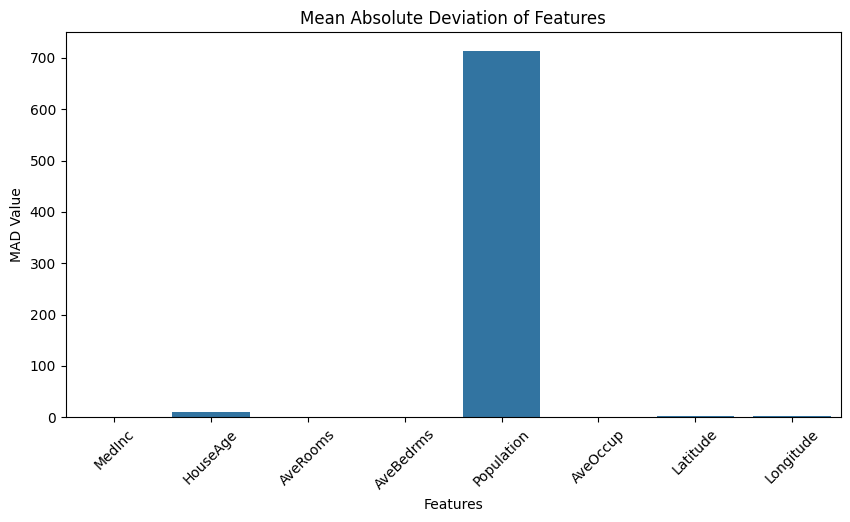

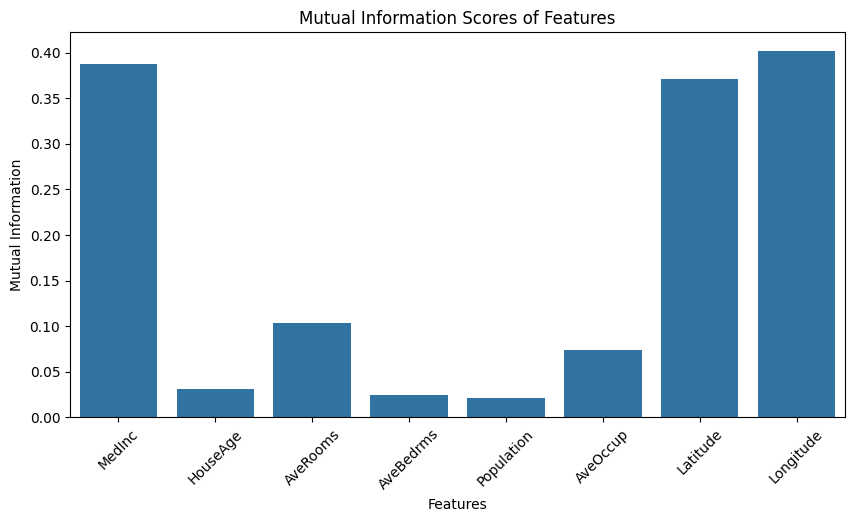

In [9]:
# Visualization
plt.figure(figsize=(10, 5))
sns.barplot(x=X.columns, y=feature_mad)
plt.xticks(rotation=45)
plt.title("Mean Absolute Deviation of Features")
plt.xlabel("Features")
plt.ylabel("MAD Value")
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x=X.columns, y=mi_series)
plt.xticks(rotation=45)
plt.title("Mutual Information Scores of Features")
plt.xlabel("Features")
plt.ylabel("Mutual Information")
plt.show()

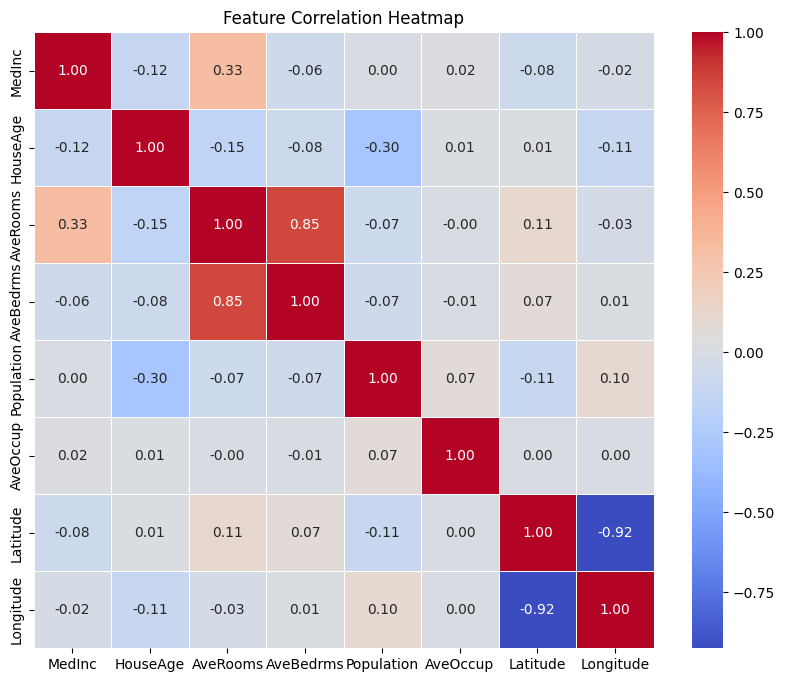

In [10]:
# ---------------------------
# Correlation Matrix Heatmap
# ---------------------------
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()



Feature Correlations with Target:
 MedInc        0.688075
AveRooms      0.151948
Latitude      0.144160
HouseAge      0.105623
AveBedrms     0.046701
Longitude     0.045967
Population    0.024650
AveOccup      0.023737
dtype: float64


C:\Users\kmgs4\AppData\Local\Temp\ipykernel_804\1489929469.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations_with_target.index, y=correlations_with_target.values, palette="viridis")


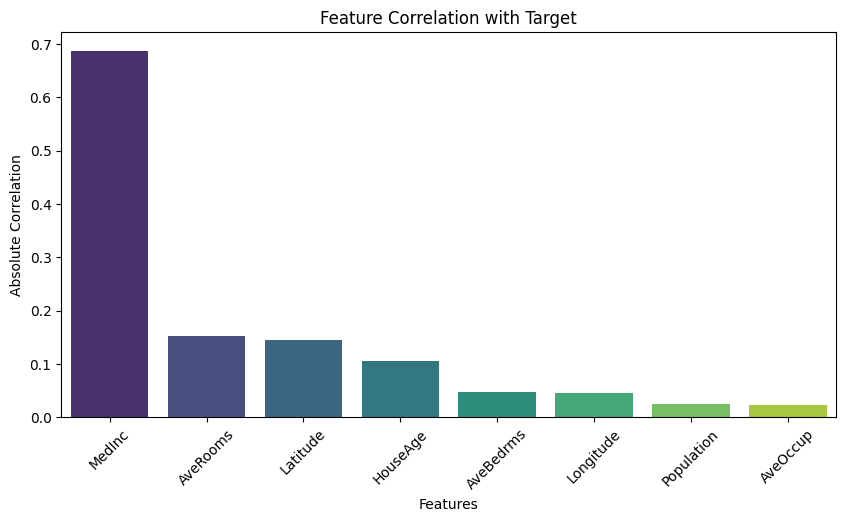

In [11]:
# ---------------------------
# Feature Correlation with Target
# ---------------------------
correlations_with_target = X.apply(lambda col: np.abs(np.corrcoef(col, y)[0, 1]))

# Sorting by absolute correlation value
correlations_with_target = correlations_with_target.sort_values(ascending=False)
print("\nFeature Correlations with Target:\n", correlations_with_target)

# Visualizing correlation with target
plt.figure(figsize=(10, 5))
sns.barplot(x=correlations_with_target.index, y=correlations_with_target.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Feature Correlation with Target")
plt.xlabel("Features")
plt.ylabel("Absolute Correlation")
plt.show()


# **Feature Selection Analysis Using Filter Methods**

## **1. Dataset Overview**
- The dataset used is the **California Housing dataset**, which contains information about housing prices and related features.
- It consists of **8 numerical features** such as:
  - `MedInc` (Median Income)
  - `HouseAge` (House Age)
  - `AveRooms` (Average Rooms per Household)
  - `AveBedrms` (Average Bedrooms per Household)
  - `Population` (Population in the area)
  - `AveOccup` (Average Occupancy per Household)
  - `Latitude` (Latitude Coordinate)
  - `Longitude` (Longitude Coordinate)
- The **target variable (`y`) represents the median house value** in California.
- The dataset is **clean and structured**, with no categorical variables or missing values.

---

## **2. Feature Selection Techniques and Findings**

### **2.1 Variance Threshold Method**
- This method removes features with **low variance**, assuming they provide little information.
- The code applies three different thresholds: **0.0, 0.5, and 1.0**.

#### **Findings:**
- **Threshold 0.0**: All features are retained.
- **Threshold 0.5 and 1.0**: `AveBedrms` is removed due to low variance.
- **Implication**: `AveBedrms` does not contribute significantly to data variability and might be dropped.

---

### **2.2 Correlation with Target**
- The **absolute Pearson correlation** between each feature and the target variable is calculated.
- The code applies three correlation thresholds: **0.0, 0.1, and 0.2**.

#### **Findings:**
- **Top correlated features**:
  - `MedInc` (0.688) - Strongest positive correlation
  - `AveRooms` (0.152), `Latitude` (0.144), and `HouseAge` (0.106) - Moderate correlation
- **Weakly correlated features (<0.05):** `AveBedrms`, `Population`, `AveOccup`, `Longitude`
- **Implication**: `MedInc` is the strongest predictor, while `AveBedrms`, `Population`, and `AveOccup` may not contribute much to predictions.

---

### **2.3 Mean Absolute Deviation (MAD) Method**
- **MAD measures the average deviation from the mean**, identifying features with little variation.
- The code applies thresholds: **0.0, 0.5, and 1.0**.

#### **Findings:**
- Features with high MAD: `MedInc`, `HouseAge`, `AveRooms`, `Latitude`, `Longitude`, and `Population`.
- Features with low MAD: `AveBedrms`, `AveOccup` (suggesting little variance across samples).
- **Implication**: `AveBedrms` and `AveOccup` contribute little differentiating information and may be dropped.

---

### **2.4 Mutual Information (Information Gain)**
- **Mutual Information (MI)** captures both **linear and non-linear relationships** between features and the target.
- Thresholds applied: **0.0, 0.01, and 0.05**.

#### **Findings:**
- Highest MI scores: `MedInc` (0.388), `Longitude` (0.402), `Latitude` (0.370).
- Moderate MI: `AveRooms` (0.103), `AveOccup` (0.073).
- Low MI: `Population` (0.021), `AveBedrms` (0.025), `HouseAge` (0.031).
- **Implication**: `MedInc`, `Latitude`, and `Longitude` are significant, while `Population` and `AveBedrms` provide minimal predictive value.

---

## **3. Visual Analysis and Inferences**

### **3.1 Boxplot Analysis (Outlier Detection)**
- **Purpose**: Detect outliers and understand the spread of each feature.

#### **Findings:**
- **MedInc has high-value outliers** (wealthy neighborhoods).
- **AveRooms and Population show extreme values**, likely due to exceptionally large households.
- **Implication**: Possible **log transformation** or **outlier removal** might be needed for skewed features.

---

### **3.2 Correlation Heatmap (Feature Relationships)**
- **Purpose**: Identify multicollinearity among features.

#### **Findings:**
- `AveRooms` and `AveBedrms` are **highly correlated (>0.8)**.
- `Latitude` and `Longitude` show moderate correlation, confirming that **location-based features are interrelated**.
- **Implication**: Multicollinear features like `AveRooms` and `AveBedrms` **may cause redundancy**, requiring dimensionality reduction.

---

### **3.3 Correlation with Target Analysis**
- **Purpose**: Identify the most important predictors of house prices.

#### **Findings:**
- `MedInc` has the **highest correlation (0.688)**, confirming it as the most important feature.
- `Population`, `AveOccup`, and `AveBedrms` have weak correlations (<0.05), making them **poor predictors**.
- **Implication**: The model should prioritize `MedInc`, while weakly correlated features may be **removed**.

---

## **4. Final Summary and Recommendations**

### **Key Insights**
✔ **`MedInc` is the most significant feature**, strongly correlated with house prices.
✔ **`AveRooms` and `AveBedrms` are highly correlated** – one of them should be dropped to avoid redundancy.
✔ **`Latitude` and `Longitude` contribute moderately** but should be combined with other features.
✔ **`Population` and `AveOccup` have weak predictive power** and should be removed.
✔ **Outliers exist in `MedInc`, `AveRooms`, and `Population`** – normalization or transformation is recommended.




